# Contents
1. Building a feed forward NN to categorise movie reviews into positive and negative
2. Understanding early stopping and why is it needed
3. Dealing with Overfitting
    1. Weight Regularization
    2. Dropout Regularization

In [ ]:
from keras.datasets import imdb

In [2]:
(train_data , train_labels) , (test_data , test_labels) = imdb.load_data(num_words=10000)

In [3]:
word_index = imdb.get_word_index()

In [4]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [5]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [6]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16 , activation = 'relu' , input_shape=(10000,)))
model.add(layers.Dense(16 , activation='relu'))
model.add(layers.Dense(1 , activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])


x_val = x_train[:5000]
partial_x_train = x_train[5000:]
y_val = y_train[:5000]
partial_y_train = y_train[5000:]



history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 20000 samples, validate on 5000 samples
Epoch 1/20
20000/20000 [==============================] - 2s 122us/step - loss: 0.4726 - acc: 0.8065 - val_loss: 0.3671 - val_acc: 0.8576
Epoch 2/20
20000/20000 [==============================] - 2s 102us/step - loss: 0.2718 - acc: 0.9059 - val_loss: 0.2939 - val_acc: 0.8864
Epoch 3/20
20000/20000 [==============================] - 2s 108us/step - loss: 0.2025 - acc: 0.9306 - val_loss: 0.2697 - val_acc: 0.8916
Epoch 4/20
20000/20000 [==============================] - 2s 104us/step - loss: 0.1668 - acc: 0.9412 - val_loss: 0.2804 - val_acc: 0.8904
Epoch 5/20
20000/20000 [==============================] - 2s 106us/step - loss: 0.1407 - acc: 0.9516 - val_loss: 0.2834 - val_acc: 0.8898
Epoch 6/20
20000/20000 [==============================] - 2s 114us/step - loss: 0.1189 - acc: 0.9593 - val_loss: 0.3088 - val_acc: 0.8862
Epoch 7/20
20000/20000 [==============================] - 2s 118us/step - loss: 0.1058 - acc: 0.9648 - val_loss: 0.3275 - v

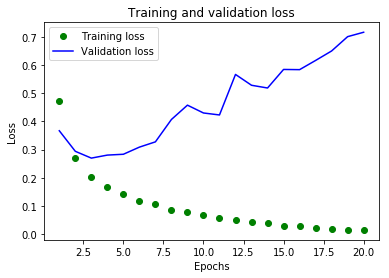

In [7]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(history_dict['acc']) + 1)
plt.plot(epochs, loss_values, 'go', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

From the above plot , we can clearly see that the models starts overfitting after around epoch 4

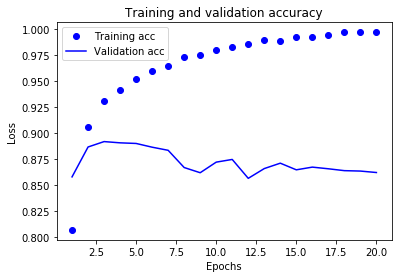

In [8]:
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Same pattern can be seen on the validation accuracy . Although the training accuracy keeps on increasing , the validation accuracy becomes non-increasing around epoch 4 and then continues to jump between increasing and decreasing

# Early Stopping
How about we stop the model when the improvement stops and use the model at that point as our final model.
Let's train the network till epoch 4 only.

In [9]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])
model.fit(x_train, 
          y_train, 
          epochs=4, 
          batch_size=512)

Epoch 1/4
25000/25000 [==============================] - 2s 90us/step - loss: 0.4355 - acc: 0.8288
Epoch 2/4
25000/25000 [==============================] - 2s 89us/step - loss: 0.2529 - acc: 0.9118
Epoch 3/4
25000/25000 [==============================] - 2s 91us/step - loss: 0.1964 - acc: 0.9282
Epoch 4/4
25000/25000 [==============================] - 2s 92us/step - loss: 0.1629 - acc: 0.9408


In [10]:
model.evaluate(x_test,y_test)

25000/25000 [==============================] - 2s 94us/step


[0.29529120992660524, 0.88288]

# Effect of Adding a Regularizer

In [12]:
from keras import models
from keras import layers
from keras import regularizers

model = models.Sequential()
model.add(layers.Dense(16 , activation = 'relu' , input_shape=(10000,)))
model.add(layers.Dense(16 , activation='relu'))
model.add(layers.Dense(1 , activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])


regularized_model = models.Sequential()
regularized_model.add(layers.Dense(16 , kernel_regularizer = regularizers.l2(0.001) ,activation = 'relu' , input_shape=(10000,)))
regularized_model.add(layers.Dropout(0.5))
regularized_model.add(layers.Dense(16 , kernel_regularizer = regularizers.l2(0.001),activation='relu'))
regularized_model.add(layers.Dropout(0.5))
regularized_model.add(layers.Dense(1 , activation='sigmoid'))




x_val = x_train[:5000]
partial_x_train = x_train[5000:]
y_val = y_train[:5000]
partial_y_train = y_train[5000:]



history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=50,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 20000 samples, validate on 5000 samples
Epoch 1/50
20000/20000 [==============================] - 2s 116us/step - loss: 0.4895 - acc: 0.7954 - val_loss: 0.3775 - val_acc: 0.8460
Epoch 2/50
20000/20000 [==============================] - 2s 109us/step - loss: 0.2795 - acc: 0.9090 - val_loss: 0.2873 - val_acc: 0.8850
Epoch 3/50
20000/20000 [==============================] - 2s 104us/step - loss: 0.2117 - acc: 0.9270 - val_loss: 0.2690 - val_acc: 0.8938
Epoch 4/50
20000/20000 [==============================] - 2s 105us/step - loss: 0.1731 - acc: 0.9394 - val_loss: 0.3312 - val_acc: 0.8678
Epoch 5/50
20000/20000 [==============================] - 2s 104us/step - loss: 0.1463 - acc: 0.9513 - val_loss: 0.2810 - val_acc: 0.8922
Epoch 6/50
20000/20000 [==============================] - 2s 107us/step - loss: 0.1270 - acc: 0.9583 - val_loss: 0.2923 - val_acc: 0.8914
Epoch 7/50
20000/20000 [==============================] - 2s 103us/step - loss: 0.1089 - acc: 0.9641 - val_loss: 0.3176 - v

In [13]:
regularized_model.compile(optimizer='rmsprop',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

history_regularized = regularized_model.fit(partial_x_train,
                    partial_y_train,
                    epochs=50,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 20000 samples, validate on 5000 samples
Epoch 1/50
20000/20000 [==============================] - 2s 118us/step - loss: 0.6313 - acc: 0.6835 - val_loss: 0.4902 - val_acc: 0.8528
Epoch 2/50
20000/20000 [==============================] - 2s 106us/step - loss: 0.4893 - acc: 0.8104 - val_loss: 0.4046 - val_acc: 0.8638
Epoch 3/50
20000/20000 [==============================] - 2s 105us/step - loss: 0.4175 - acc: 0.8567 - val_loss: 0.3572 - val_acc: 0.8828
Epoch 4/50
20000/20000 [==============================] - 2s 104us/step - loss: 0.3698 - acc: 0.8855 - val_loss: 0.3619 - val_acc: 0.8662
Epoch 5/50
20000/20000 [==============================] - 2s 104us/step - loss: 0.3387 - acc: 0.9017 - val_loss: 0.3315 - val_acc: 0.8866
Epoch 6/50
20000/20000 [==============================] - 2s 107us/step - loss: 0.3189 - acc: 0.9134 - val_loss: 0.3288 - val_acc: 0.8886
Epoch 7/50
20000/20000 [==============================] - 2s 104us/step - loss: 0.2895 - acc: 0.9209 - val_loss: 0.3442 - v

In [ ]:
import matplotlib.pyplot as plt
history_dict = history.history
history_dict_regularized = history_regularized.history
loss_values = history_dict['val_loss']
loss_values_regularized = history_dict_regularized['val_loss']
epochs = range(1, len(history_dict['acc']) + 1)
plt.plot(epochs, loss_values, 'go', label='Validation loss of Simple Model')
plt.plot(epochs, loss_values_regularized, 'b', label='Validation loss of Weight-Dropout Regularized Model')
plt.title('Regularized vs Unregularized Validation Losses')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Saving and Reusing models

Wow , now that the regularized model looks good , we might want to save it so that the results can be reproduced.
It is very simple to save your trained models . We need to load the model structure and also the corresponding weights for each layer in the model.

In [15]:
model_json = regularized_model.to_json()
with open("regularized_model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


In [17]:
from keras.models import model_from_json
json_file = open('regularized_model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")

Loaded model from disk


We have the model saved in the variable loaded_model now.

It is important to compile the loaded model before it is used. This is so that predictions made using the model can use the appropriate efficient computation from the Keras backend.